In [1]:
#Import libraries
import pandas as pd
import calendar
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import islice

In [3]:
# 1. Data cleaning

In [5]:
retail_data = pd.read_excel("C:/Users/61450/Downloads/Online Retail.xlsx")  #Load the dataset

In [7]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
pd.isnull(retail_data).sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# 1.1 Identify and remove duplicate transactions
# Transactions are duplicate if invoice no and stock code are exaxtly the same.

In [13]:
retail_data_clean = retail_data.drop_duplicates(subset=["InvoiceNo","StockCode"], keep='first')

In [15]:
# 1.2 Handle missing and invalid values in quantity

In [17]:
sum(retail_data_clean.loc[0:, 'Quantity']<=0)

10475

In [19]:
retail_data_clean = retail_data_clean[retail_data_clean['Quantity']>0]

In [21]:
# 1.3 Handle missing and invalid values in unit price

In [23]:
sum(retail_data_clean.loc[0:, 'UnitPrice']<=0)

1168

In [25]:
retail_data_clean = retail_data_clean[retail_data_clean['UnitPrice']>0]

In [27]:
# 1.4 Handle missing customer ID

In [29]:
retail_data_clean = pd.DataFrame(retail_data_clean)

In [31]:
retail_data_clean['CustomerID'] = retail_data_clean['CustomerID'].fillna('guest')

In [33]:
retail_data_clean['CustomerID']= retail_data_clean['CustomerID'].astype(str)

In [35]:
# 1.5 Save the cleaned dataset

In [37]:
cleaned_online_retail = retail_data_clean
cleaned_online_retail.to_csv('C:/Users/61450/Downloads/cleaned_online_retail.csv', index=False)

In [38]:
cleaned_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
# 2. Feature Engineering

In [40]:
# 2.1  Calculate Total price column

In [41]:
cleaned_online_retail['TotalPrice'] = cleaned_online_retail['Quantity'] * cleaned_online_retail['UnitPrice']

In [42]:
# 2.2 Extract month from invoice data

In [49]:
cleaned_online_retail['year'] = pd.DatetimeIndex(cleaned_online_retail['InvoiceDate']).year

In [51]:
cleaned_online_retail['month'] = pd.DatetimeIndex(cleaned_online_retail['InvoiceDate']).month

In [53]:
cleaned_online_retail['month'] = cleaned_online_retail['month'].apply(lambda x: calendar.month_name[x])

In [54]:
# 2.3 Extract day of week from invoice data

In [55]:
cleaned_online_retail['day_of_week'] = cleaned_online_retail['InvoiceDate'].dt.day_name()

In [56]:
# 2.4 Binary feature for transactions that occur during peak hours (9am - 6pm)

In [57]:
cleaned_online_retail['time']= cleaned_online_retail['InvoiceDate'].dt.time

In [58]:
start = datetime.time(9, 0, 0)
end = datetime.time(18, 0, 0)
peak_hour = []
for i in cleaned_online_retail['time']:
    if i > start and i < end:
        peak_hour.append('Yes')
    else:
        peak_hour.append('No')

cleaned_online_retail['Peak_hours'] = peak_hour

In [59]:
# 2.5 Save the feature engineered dataset

In [60]:
feature_engineered_online_retail = cleaned_online_retail
feature_engineered_online_retail.to_csv('C:/Users/61450/Downloads/feature_engineered_online_retail.csv', index=False)

In [69]:
feature_engineered_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month,day_of_week,time,Peak_hours
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,08:26:00,No
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00,No
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,08:26:00,No
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00,No
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,08:26:00,No


In [71]:
# 3. Exploratory data analysis

In [73]:
# 3.1 Sales aggregated by month

In [95]:
cl = feature_engineered_online_retail[feature_engineered_online_retail['year']==2011].groupby(by='month')

In [97]:
sale = []
for a in feature_engineered_online_retail['month'].unique():
    sale.append(cl.get_group(a)['TotalPrice'].sum())

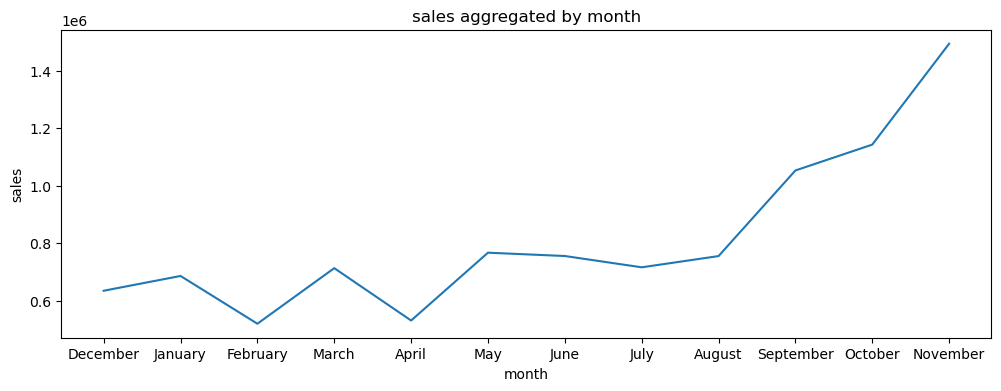

In [99]:
plt.figure(figsize=(12,4))
plt.plot(feature_engineered_online_retail['month'].unique(), sale)
plt.xlabel('month')
plt.ylabel('sales')
plt.title('sales aggregated by month')
plt.show()

In [79]:
# 3.2 Sales aggregated by day of week

In [101]:
cl = feature_engineered_online_retail[feature_engineered_online_retail['year']==2011].groupby(by='day_of_week')

In [103]:
sale = []
for a in feature_engineered_online_retail['day_of_week'].unique():
    sale.append(cl.get_group(a)['TotalPrice'].sum())

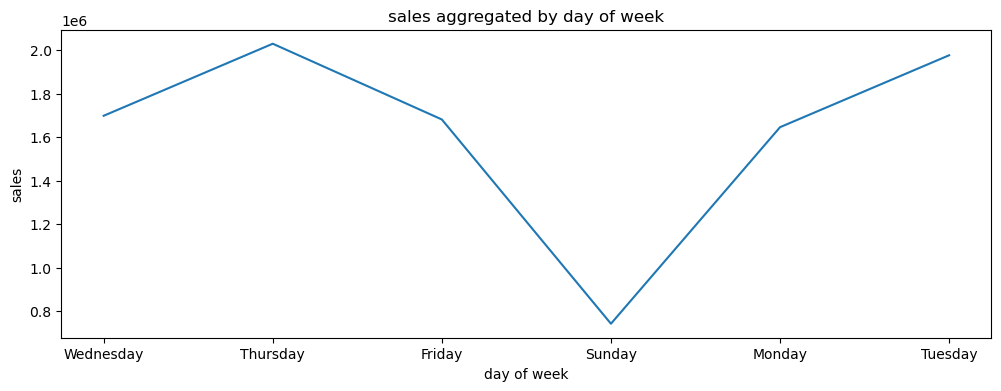

In [105]:
plt.figure(figsize=(12,4))
plt.plot(feature_engineered_online_retail['day_of_week'].unique(), sale)
plt.xlabel('day of week')
plt.ylabel('sales')
plt.title('sales aggregated by day of week')
plt.show()

In [87]:
# 3.3 Sales aggregated by month and day of week 

In [107]:
sales_grouping = feature_engineered_online_retail[feature_engineered_online_retail['year']==2011].groupby(['day_of_week', 'month'])
sales_by_group = sales_grouping['TotalPrice'].sum()
sales_by_group

day_of_week  month    
Friday       April         78857.641
             August        96338.510
             December     258037.200
             February      84587.150
             January      128919.720
                             ...    
Wednesday    March        118064.890
             May          119678.830
             November     315147.810
             October      184972.660
             September    149971.070
Name: TotalPrice, Length: 72, dtype: float64

Text(0.5, 1.0, 'sales aggregated over month and day of week')

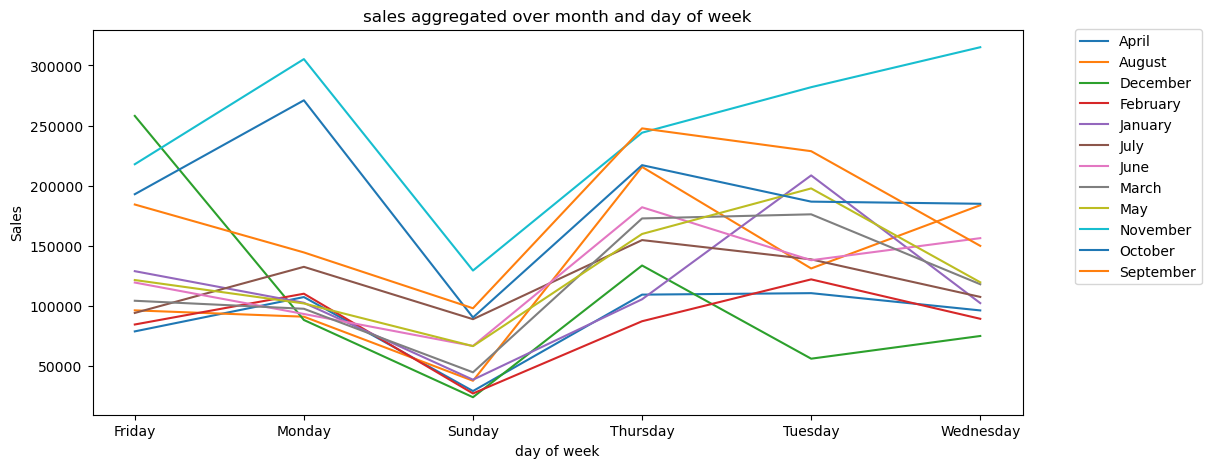

In [109]:
ax = sales_by_group.unstack().plot(figsize=(12,5))
ax.legend(bbox_to_anchor=(1.2, 1.02), loc='upper right')
plt.xlabel('day of week')
plt.ylabel('Sales')
plt.title('sales aggregated over month and day of week')

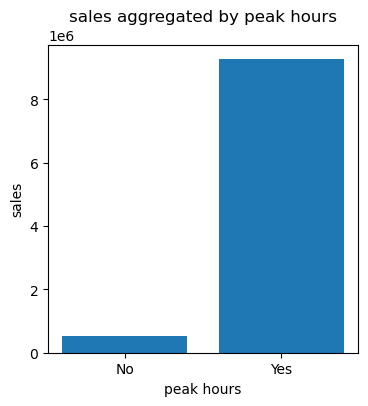

In [135]:
# Sales by peak hours
cl = feature_engineered_online_retail[feature_engineered_online_retail['year']==2011].groupby(by='Peak_hours')
sale = []
for a in feature_engineered_online_retail['Peak_hours'].unique():
    sale.append(cl.get_group(a)['TotalPrice'].sum())
plt.figure(figsize=(4,4))
plt.bar(feature_engineered_online_retail['Peak_hours'].unique(), sale)
plt.xlabel('peak hours')
plt.ylabel('sales')
plt.title('sales aggregated by peak hours')
plt.show()

In [92]:
# 4. Customer spending

In [ ]:
# 4.1 Top 10 customers by total spending

In [137]:
cl = feature_engineered_online_retail.groupby(by='CustomerID')

In [139]:
sales = []
for a in feature_engineered_online_retail['CustomerID'].unique():
    sales.append(cl.get_group(a)['TotalPrice'].sum())

In [140]:
values = sales
keys = feature_engineered_online_retail['CustomerID'].unique()

In [143]:
#create dictionary of customers and sales
sorted_index = np.flip(np.argsort(values))
cust_sales = {keys[i] : values[i] for i in sorted_index}

In [151]:
# Top 11 customers by total price
first_11 = dict(islice(cust_sales.items(), 11))

In [153]:
print('Top 11 customers are:', list(first_11.keys()))

Top 11 customers are: ['guest', '14646.0', '18102.0', '17450.0', '16446.0', '14911.0', '12415.0', '14156.0', '17511.0', '16029.0', '12346.0']


In [149]:
# 4.2 Distribution of spending across customers

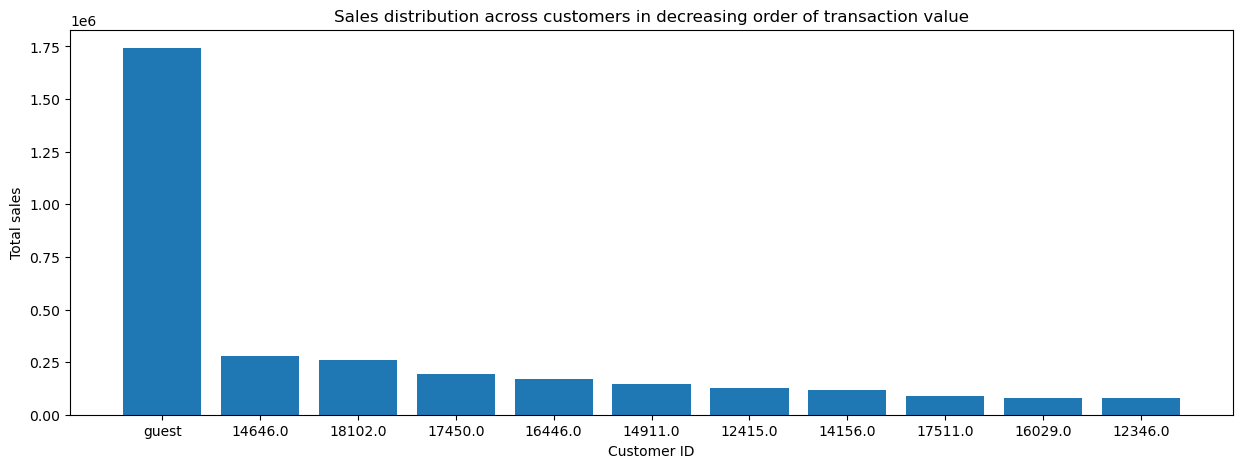

In [173]:
fig = plt.figure(figsize = (15, 5))
plt.bar(first_11.keys(), first_11.values())
plt.xlabel("Customer ID")
plt.ylabel("Total sales")
plt.title("Sales distribution across customers in decreasing order of transaction value")
plt.show()

In [ ]:
# 4.3 Average transaction value

In [183]:
average_tran = feature_engineered_online_retail['TotalPrice'].sum()/len(feature_engineered_online_retail)
print('Average transaction value', average_tran)

Average transaction value 20.376024829574547


In [ ]:
# 4.4 Visualize distribution of transactions

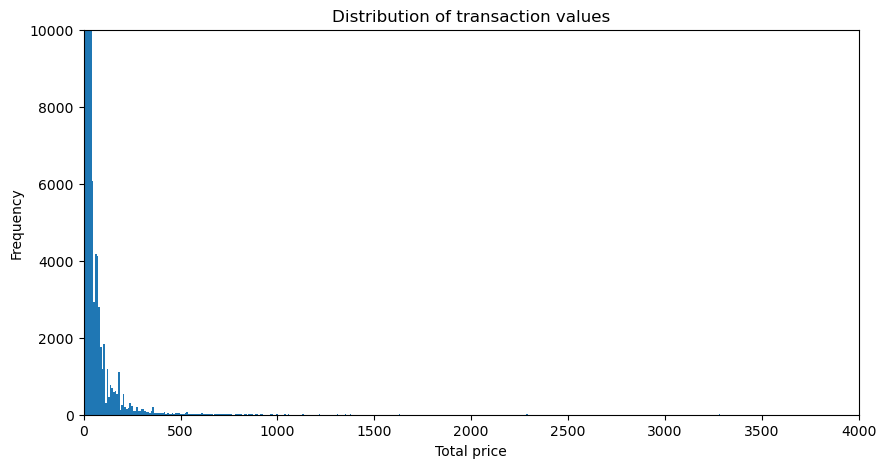

In [195]:
fig = plt.figure(figsize = (10, 5))
plt.hist(feature_engineered_online_retail['TotalPrice'], bins=20000)
plt.xlim(0,4000)
plt.ylim(0,10000)
plt.xlabel("Total price")
plt.ylabel("Frequency")
plt.title("Distribution of transaction values below ")
plt.show()

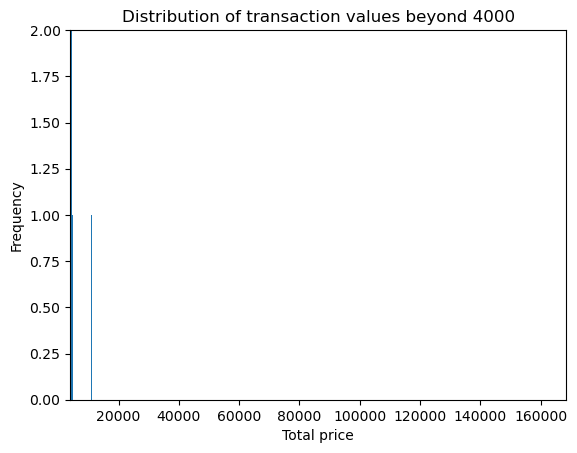

In [197]:
plt.hist(feature_engineered_online_retail['TotalPrice'], bins=1000)
plt.xlim(4000,max(feature_engineered_online_retail['TotalPrice']))
plt.ylim(0, 2)
plt.xlabel("Total price")
plt.ylabel("Frequency")
plt.title("Distribution of transaction values beyond 4000")
plt.show()

In [ ]:
# The distribution of transaction values is heavily skewed towards left, indicating that the frequency of 
# sales value is the highest in the range 0 to 50. The values are as low as 0.001 and as high as 80000. But the frequcy of occurrence of extremely 
# high values is the lowest and extremely low values is much higher.

In [174]:
# Insights

# Sales show monthly fluctuations between December and July. Sales slowly improve after July and surge after August. Sales peak in November followed 
# by lean season that begins in December. The transactions are the lowest in February and April. 
# The aggregate transaction value by day of the week shows peak sales on Thursday and Tuesday. The sales are lowest on Sunday. The aggregate transaction 
# by month and day of week shows that sales are always lowest on Sundays for nearly all the months. 
# While sales peak on Monday and Thursday or Tuesdays for most of the months, December shows the highest sales on Fridays and November on Wednesdays.
# Sales are generally higher during peak hours (between 9am and 6pm).

# The top 10 customers in terms of transaction value have customer IDs '14646', '18102', '17450', '16446', '14911.0', '12415', '14156', '17511', '16029',
# '12346'. Although the aggreagte transaction value is highest for the customers with unknown customer IDs (termed as guests), the most valubale 
# customers with known IDs begin from 14646. 

In [ ]:
# Recommendations

# Design marketing campaign to enhance sales during lean period, especially February and April.
# The marketing campaign should take into account the consumption pattern of the most valuable customers.
# Factors like time of shopping, day of shopping and type of stock purchased should be taken into account while designing the campaign.
# There should be more focus on enhancing sales of stock whose average transaction value is around 20.
# There can be special offers on specific days like Tuesdays and Thursdays to increase sales in lean months.